In [15]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [16]:
!unzip fruits.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [18]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.


Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


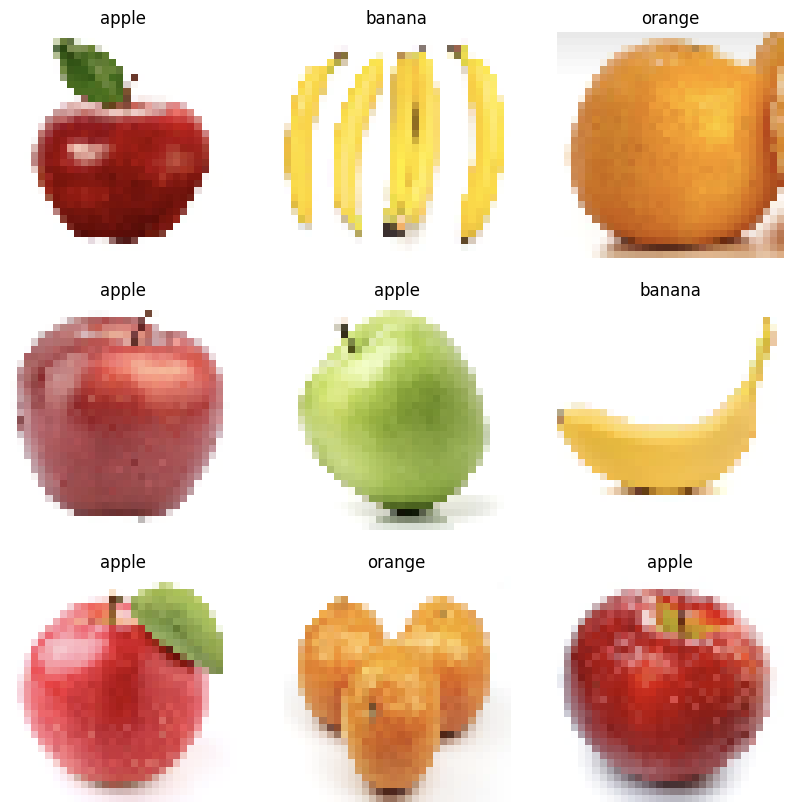

In [19]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [20]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)


In [21]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [22]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.4040 - loss: 1.0692 - val_accuracy: 0.7424 - val_loss: 0.8850
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7161 - loss: 0.7487 - val_accuracy: 0.7727 - val_loss: 0.4133
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8150 - loss: 0.4211 - val_accuracy: 0.9242 - val_loss: 0.2623
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9015 - loss: 0.2798 - val_accuracy: 0.8485 - val_loss: 0.3236
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9313 - loss: 0.1999 - val_accuracy: 0.9545 - val_loss: 0.1549
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9525 - loss: 0.1597 - val_accuracy: 0.8788 - val_loss: 0.2920
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9511 - loss: 0.1266 - val_accuracy: 0.9545 - val_loss: 0.1212
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9310 - loss: 0.1736 - val_accuracy: 0.9394 - v

In [23]:
model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9350 - loss: 0.2044 


[0.2705056667327881, 0.9153845906257629]

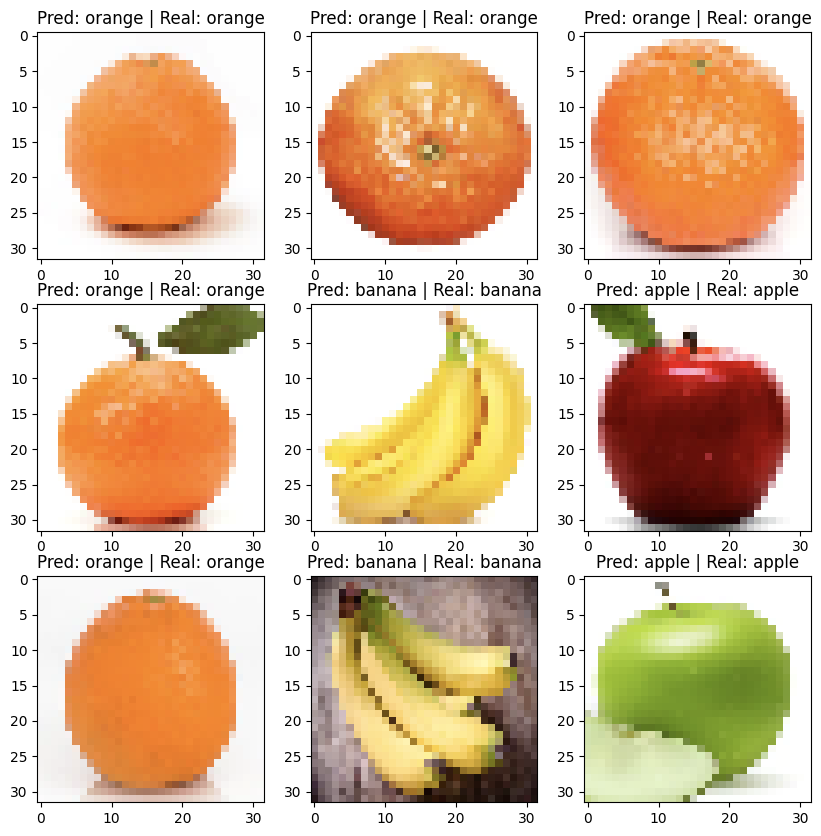

In [24]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [25]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\knigh\AppData\Local\Temp\tmppuz1cwfy\assets


INFO:tensorflow:Assets written to: C:\Users\knigh\AppData\Local\Temp\tmppuz1cwfy\assets


Saved artifact at 'C:\Users\knigh\AppData\Local\Temp\tmppuz1cwfy'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor_11')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2096889686992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2096889687568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2096889687184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2096889688144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2096889686032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2096889688912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2096889688336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2096889689680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2096889689104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2096889690448: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.lite.python.interpreter import Interpreter

# Load the TensorFlow Lite model
interpreter = Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Get input and output tensor details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


In [27]:
def evaluate_tflite_model(interpreter, test_ds, class_names):
    correct_predictions = 0
    total_predictions = 0

    for images, labels in test_ds:
        # Prepare the input data
        input_data = np.array(images)
        
        # Ensure input data is in the correct format
        input_data = np.array(input_data, dtype=np.float32)
        
        # Run inference
        interpreter.set_tensor(input_details[0]['index'], input_data)
        interpreter.invoke()
        
        # Get the output data
        output_data = interpreter.get_tensor(output_details[0]['index'])
        
        # Convert logits to probabilities
        predictions = tf.nn.softmax(output_data).numpy()

        # Calculate accuracy
        predicted_classes = np.argmax(predictions, axis=1)
        correct_predictions += np.sum(predicted_classes == labels.numpy())
        total_predictions += len(labels)
    
    accuracy = correct_predictions / total_predictions
    return accuracy


In [38]:
# Evaluate the TensorFlow model again for reference
tensorflow_accuracy = model.evaluate(test_ds, verbose=0)[1]
print(f'TensorFlow Model Accuracy: {tensorflow_accuracy:.4f}')




TensorFlow Model Accuracy: 0.9538


In [39]:
# Train the model and capture the history
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9805 - loss: 0.0427 - val_accuracy: 0.9394 - val_loss: 0.1768
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9951 - loss: 0.0333 - val_accuracy: 0.9697 - val_loss: 0.1099
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9878 - loss: 0.0450 - val_accuracy: 0.9848 - val_loss: 0.0930
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9921 - loss: 0.0422 - val_accuracy: 0.9091 - val_loss: 0.3111
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9899 - loss: 0.0299 - val_accuracy: 0.9697 - val_loss: 0.0610
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9819 - loss: 0.0407 - val_accuracy: 0.9394 - val_loss: 0.1675
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9930 - loss: 0.0259 - val_accuracy: 0.9697 - val_loss: 0.0952
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9957 - loss: 0.0165 - val_accuracy: 0.9242 - v

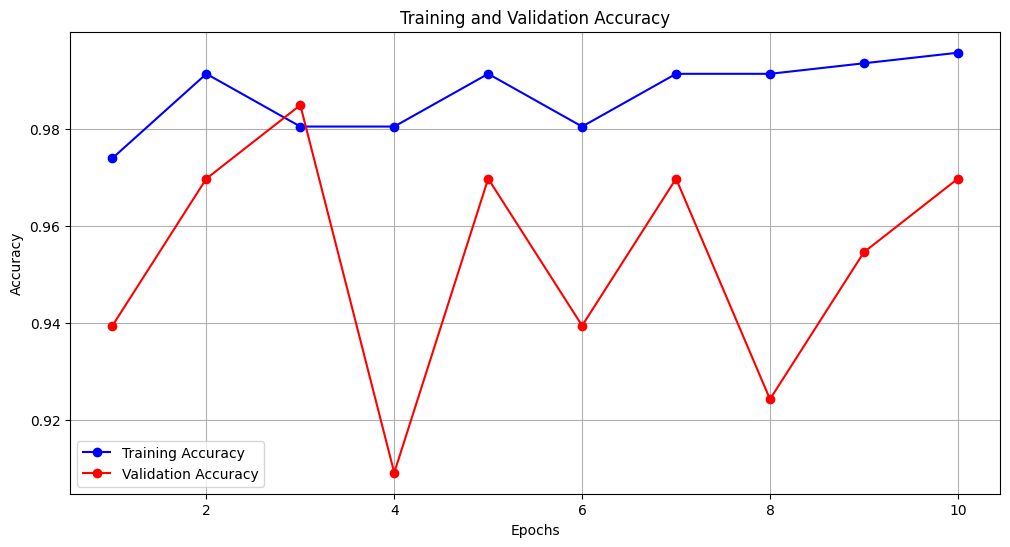

In [40]:
import matplotlib.pyplot as plt

# Extract accuracy data from history
history_dict = history.history
epochs = range(1, len(history_dict['accuracy']) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, history_dict['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [44]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Define a function to get model predictions and true labels
def get_predictions_and_labels(model, dataset):
    all_labels = []
    all_predictions = []

    for images, labels in dataset:
        # Make predictions
        predictions = model(images, training=False)
        predicted_classes = np.argmax(predictions.numpy(), axis=1)

        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted_classes)
    
    return np.array(all_labels), np.array(all_predictions)

# Get predictions and labels from the test dataset
test_labels, test_predictions = get_predictions_and_labels(model, test_ds)


In [45]:

# Compute precision, recall, and F1 score
precision = precision_score(test_labels, test_predictions, average='weighted')
recall = recall_score(test_labels, test_predictions, average='weighted')
f1 = f1_score(test_labels, test_predictions, average='weighted')




In [46]:

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')



Precision: 0.9542
Recall: 0.9538
F1 Score: 0.9537


In [47]:
# Optional: Print a full classification report
report = classification_report(test_labels, test_predictions, target_names=class_names)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

       apple       0.94      0.94      0.94        47
      banana       0.98      0.93      0.95        43
      orange       0.95      1.00      0.98        40

    accuracy                           0.95       130
   macro avg       0.95      0.96      0.95       130
weighted avg       0.95      0.95      0.95       130



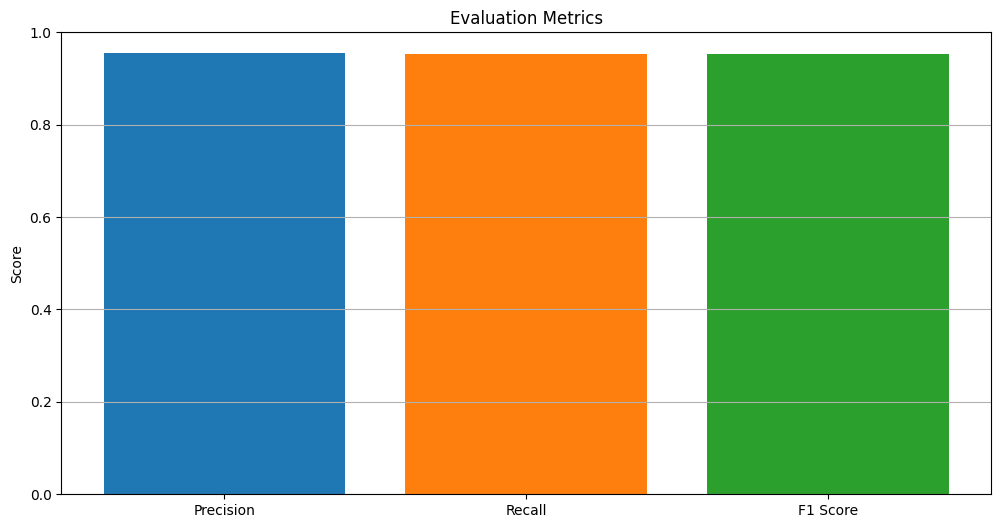

In [48]:

# Plot metrics (precision, recall, and F1 score) with different colors
plt.figure(figsize=(12, 6))

metrics = [precision, recall, f1]
metrics_names = ['Precision', 'Recall', 'F1 Score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Different colors for each metric

plt.bar(metrics_names, metrics, color=colors)
plt.title('Evaluation Metrics')
plt.ylabel('Score')
plt.ylim([0, 1])
plt.grid(axis='y')
plt.show()